# Data visualization for the SQL  project  


In [1]:
# Import libraies 
import numpy as np
import pandas as pd
from datetime import datetime
import os
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx

## [Q1] What is the distribution of customers across states?

In [2]:
# Download csv file obtained from mySQL 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q1.csv")

# Read the file
df = pd.read_csv(path)
df.head()

state  CNT  total_customers
0            California   97              994
1                 Texas   97              994
2               Florida   86              994
3              New York   69              994
4  District of Columbia   35              994

In [3]:
# Plot the figure 
fig = px.bar(df, 
             x='state', 
             y='CNT',
             labels={'CNT':'number of customers'})

number_of_states=len(df['state']) # number of states in df 

# Prepare the layout of figure
fig.update_layout(
    title="Distiribution of customers across {} states:".format(number_of_states),
    xaxis_title="States",
    yaxis_title="Number of customers",
    autosize=False,
    width=1000,
    height=600,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')


fig.show()

print('Note: USA has 50 states. In df, we have only 49 states because no sales exist in South Dakota (see map below)')


Note: USA has 50 states. In df, we have only 49 states because no sales exist in South Dakota (see map below)


In [4]:
## Visualization of this distribution on the USA map

# Find the path for the file USA (containing the state codes e.g CA stands for California)
path = os.path.join(os.getcwd(),"USA.csv")

# Read the file
df_usa = pd.read_csv(path, sep=';')

# Merge data on states (in order to have state codes, which are required later for ploting the USA map)
merged_df = pd.merge(df,
                     df_usa,
                     how="inner",
                     on='state')

# Plot the figure 
fig = px.choropleth(merged_df,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='CNT', # in color column, it is neccesary to indicate the CNT - number of customers
                    color_continuous_scale="reds", 
                    
                    )

# Prepare the layout of figure
fig.update_layout(
      title_text = 'Customer distribution during Q1-Q4 by state',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

print('Observation: During four quarters, no customers were in South Dakota (grey color on the map)')

Observation: During four quarters, no customers were in South Dakota (grey color on the map)


In [5]:
# The same map (above) can be presented in the time line as a function of quarters

# Download csv file obtained from mySQL 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q1_1.csv")

# Read the file
df_Q1_1 = pd.read_csv(path)

# Merge data on states (in order to have state codes, which are required later for ploting the USA map)
merged_df_Q1_1 = pd.merge(df_Q1_1,
                     df_usa,
                     how="inner",
                     on='state')


## Visualization of this distribution on the USA map
# Plot the figure 
fig = px.choropleth(merged_df_Q1_1,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='CNT', # in color column, it is neccesary to indicate the CNT - number of customers
                    color_continuous_scale="reds", 
                    animation_frame='quarter_number')

# Prepare the layout of figure
fig.update_layout(
      title_text = 'Number of customers in the given quarter by state',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

print('Observations:')
print('')
print('Each quarter at least 5 states (and up to 12 during 3 quarter or 24 % of all states) do not have any customers. It may be useful to conduct additional study to better understand the reasons of customer lack in these states (Lists are provided below)')



Observations:

Each quarter at least 5 states (and up to 12 during 3 quarter or 24 % of all states) do not have any customers. It may be useful to conduct additional study to better understand the reasons of customer lack in these states (Lists are provided below)


In [6]:
## Additonal analytics on customer distribution: Finding the states without customers in each quarter

# Extract the unique names of states
state_names=merged_df_Q1_1.state.unique()

# Prepare the empty list for filling (during for cycle)
State_list_missing_customers_Q1=[]
State_list_missing_customers_Q2=[]
State_list_missing_customers_Q3=[]
State_list_missing_customers_Q4=[]

# Filling the empty lists if given state was not present in quarters
for state in state_names:
    state_data=merged_df_Q1_1[merged_df_Q1_1['state']==state] # get the data on state 
    state_quarter_number=state_data.quarter_number.unique() # check quarters for given state 
    
#     Fill the list if neccesary 
    if 1 not in state_quarter_number:
        State_list_missing_customers_Q1.append(state)
    if 2 not in state_quarter_number:
        State_list_missing_customers_Q2.append(state)
    if 3 not in state_quarter_number:
        State_list_missing_customers_Q3.append(state)
    if 4 not in state_quarter_number:
        State_list_missing_customers_Q4.append(state)

# Pring the results
print('List of states without customers in Q1:')
print(State_list_missing_customers_Q1)
print('')
print('List of states without customers in Q2:')
print(State_list_missing_customers_Q2)
print('')
print('List of states without customers in Q3:')
print(State_list_missing_customers_Q3)
print('')
print('List of states without customers in Q4:')
print(State_list_missing_customers_Q4)


List of states without customers in Q1:
['Maine', 'North Dakota', 'Oregon', 'Wyoming']

List of states without customers in Q2:
['Maine', 'Massachusetts', 'Mississippi', 'Montana', 'Utah', 'Vermont', 'Wisconsin']

List of states without customers in Q3:
['Hawaii', 'Maine', 'Mississippi', 'New Hampshire', 'New Jersey', 'New Mexico', 'North Dakota', 'Vermont', 'West Virginia', 'Wisconsin', 'Wyoming']

List of states without customers in Q4:
['Arkansas', 'Kentucky', 'Mississippi', 'New Mexico', 'Utah', 'Vermont', 'Wyoming']


In [7]:
## Additonal analytics on customer distribution: share of each state 

# Share of each state indivudally in % realtive to total customer number (994)
share_of_state=df['CNT']/(df['CNT'].sum())*100

# Plot the figure 
fig = px.bar(df, 
             x='state', 
             y=share_of_state,
             )

# Prepare the layout of figure
fig.update_layout(
    title="Share of each state indivudally in % realtive to total customer number",
    xaxis_title="States",
    yaxis_title="Share_of_state,%",
    autosize=False,
    width=1000,
    height=600)

fig.show()

In [8]:
## Additonal analytics on customer distribution: Checking the share of X states (e.g TOP 3 , TOP 10 etc)

# total number of customers 
number_of_customers=df['CNT'].sum() 

share_of_X_states=[]              # needed in for cycle
Number_of_customers_in_X_state=0; # needed in for cycle

# Calculating the share of customer for TOPX, where X = 0:48 
for state in range(number_of_states):
    Number_of_customers_in_X_state=Number_of_customers_in_X_state+df['CNT'][state]
    share_of_X_states.append(Number_of_customers_in_X_state/number_of_customers*100)

# Create traces
fig = go.Figure()

# Prepare the layout
fig.update_layout(
    title="Share of top X states by customer number:",
    xaxis_title="Top X states",
    yaxis_title="Share of X states, %",
    autosize=False,
    width=1000,
    height=600,

)


# Plot the figure 
fig.add_trace(go.Scatter(x=list(range(1,1+number_of_states)), y=share_of_X_states,
                        mode='lines',
                        name='Share of X states'))

fig.show()

# Print the observations
print('Observations:' )
print('More than 50 % of our customers are located in only 9 states (out of 49)' )
print('90 % of our customers are located in only 30 states (out of 49)' )
print('TOP 3 states from the begining: California and Texas hold the highest share - 9.76 % followed by Florida with 8.65  %' )
print('TOP 3 states from the end: Vermont, Wyoming and Maine each hold 0.1 % only' )

Observations:
More than 50 % of our customers are located in only 9 states (out of 49)
90 % of our customers are located in only 30 states (out of 49)
TOP 3 states from the begining: California and Texas hold the highest share - 9.76 % followed by Florida with 8.65  %
TOP 3 states from the end: Vermont, Wyoming and Maine each hold 0.1 % only


## [Q2] What is the average rating in each quarter? 

In [9]:
# Download csv file obtained from mySQL 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q2.csv")

# Read the file
df = pd.read_csv(path)

# Show data 
df

quarter_number  Average_rating
0               1          3.5548
1               2          3.3550
2               3          2.9563
3               4          2.3970

In [10]:
# Create traces
fig = go.Figure()

# Plot the figure
fig.add_trace(go.Scatter(x=df['quarter_number'], 
                         y=df['Average_rating'],
                         mode='lines',
                         name='Average rating'))

# Update the layout
fig.update_layout(
    title="Average rating per quarters:",
    xaxis_title="Quarters",
    yaxis_title="Average rating",
    autosize=False,
    width=950,
    height=600)

fig.update_layout(
        xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1)
)

fig.show()

# Print the observations
print('Observations:')
print('Average rating has reduced from',df['Average_rating'][0],'in Q1 down to',df['Average_rating'][3],'in Q4')
print('Average rating in Q4 has reduced by',round(df['Average_rating'][3]/df['Average_rating'][0]*100,2),'% relative to Q1')
print('Average rating for the year:', df.Average_rating.mean())

Observations:
Average rating has reduced from 3.5548 in Q1 down to 2.397 in Q4
Average rating in Q4 has reduced by 67.43 % relative to Q1
Average rating for the year: 3.0657750000000004


## [Q3] Are customers getting more dissatisfied over time? 


In [11]:
# Upload additional data (number of feedback group by quarter and feedback  value) 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q3.csv")

# Read the file
df = pd.read_csv(path)

# Calculate the % of each feedback group 
df['Pecrentage']=df['Number_of_ratings']/df['Total_quarter_feedback']*100

# Show data
df

quarter_number customer_feedback  Number_of_ratings  \
0                1               Bad                 35   
1                1              Good                 89   
2                1              Okay                 59   
3                1          Very Bad                 34   
4                1         Very Good                 93   
5                2               Bad                 37   
6                2              Good                 58   
7                2              Okay                 53   
8                2          Very Bad                 39   
9                2         Very Good                 75   
10               3               Bad                 52   
11               3              Good                 48   
12               3              Okay                 50   
13               3          Very Bad                 41   
14               3         Very Good                 38   
15               4               Bad                 58   
16               4              Good                 20   
17               4              Okay                 40   
18               4          Very Bad                 61   
19               4         Very Good                 20   

    Total_quarter_feedback  Pecrentage  
0                      310   11.290323  
1                      310   28.709677  
2                      310   19.032258  
3                      310   10.967742  
4                      310   30.000000  
5                      262   14.122137  
6                      262   22.137405  
7                      262   20.229008  
8                      262   14.885496  
9                      262   28.625954  
10                     229   22.707424  
11                     229   20.960699  
12                     229   21.834061  
13                     229   17.903930  
14                     229   16.593886  
15                     199   29.145729  
16                     199   10.050251  
17                     199   20.100503  
18                     199   30.653266  
19                     199   10.050251

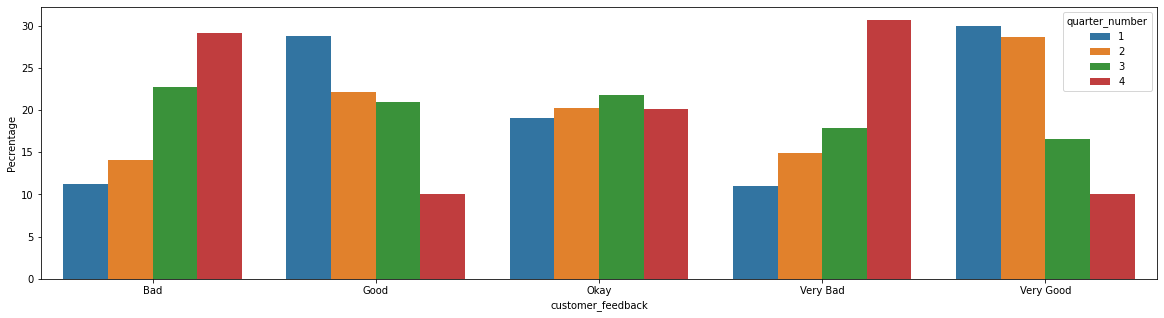

Observations:
Customers are  getting more dissatisfied over time 

Very bad, Bad and Okay feedbacks are increasing from  [10.96774194] [11.29032258] and [19.03225806] to [30.65326633] [29.14572864] [20.10050251] % correspondigly

Good and Very Good feedback are decreasing from  [28.70967742]  [30.] to [10.05025126] and [10.05025126] % correspondigly

Distrbution of rating over the year:
customer_feedback
Bad          19.316403
Good         20.464508
Okay         20.298957
Very Bad     18.602609
Very Good    21.317523
Name: Pecrentage, dtype: float64


In [12]:
# Plot customer feedback versus its number in each quarter 

#  Prepare the figure size
plt.figure(figsize=(20,5))

# Plot the figure
sns.barplot(data=df,x='customer_feedback',y='Pecrentage', hue='quarter_number');

plt.show()

# Print the observations
print('Observations:')
print('Customers are  getting more dissatisfied over time ')
print('')
VeryBad_percentage_Q1= df["Pecrentage"][(df["customer_feedback"]== 'Very Bad') & (df["quarter_number"] == 1)].values
Bad_percentage_Q1= df[(df["customer_feedback"]== 'Bad') & (df["quarter_number"] == 1)]["Pecrentage"].values
Okay_percentage_Q1= df[(df["customer_feedback"]== 'Okay') & (df["quarter_number"] == 1)]["Pecrentage"].values
VeryBad_percentage_Q4= df["Pecrentage"][(df["customer_feedback"]== 'Very Bad') & (df["quarter_number"] == 4)].values
Bad_percentage_Q4= df["Pecrentage"][(df["customer_feedback"]== 'Bad') & (df["quarter_number"] == 4)].values
Okay_percentage_Q4= df["Pecrentage"][(df["customer_feedback"]== 'Okay') & (df["quarter_number"] == 4)].values

print('Very bad, Bad and Okay feedbacks are increasing from ',VeryBad_percentage_Q1,Bad_percentage_Q1,'and',Okay_percentage_Q1,'to',VeryBad_percentage_Q4,Bad_percentage_Q4,Okay_percentage_Q4,'% correspondigly')
print('')
Good_percentage_Q1= df["Pecrentage"][(df["customer_feedback"]== 'Good') & (df["quarter_number"] == 1)].values
Very_Good_percentage_Q1= df["Pecrentage"][(df["customer_feedback"]== 'Very Good') & (df["quarter_number"] == 1)].values
Good_percentage_Q4= df["Pecrentage"][(df["customer_feedback"]== 'Good') & (df["quarter_number"] == 4)].values
Very_Good_percentage_Q4= df["Pecrentage"][(df["customer_feedback"]== 'Very Good') & (df["quarter_number"] == 4)].values

print('Good and Very Good feedback are decreasing from ',Good_percentage_Q1,'',Very_Good_percentage_Q1,'to',Good_percentage_Q4,'and',Very_Good_percentage_Q4,'% correspondigly')
print('')
print('Distrbution of rating over the year:')
print(df.groupby('customer_feedback')['Pecrentage'].mean())

In [13]:
# Checking the average rating of vehicle maker (to better understand where the low rating may come from ) 

# Download csv file obtained from mySQL 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q2_2.csv")

# Read the file
df = pd.read_csv(path)

# Show data 
df

# Plot the figure 
fig = px.bar(df, 
             x='vehicle_maker', 
             y='Average_rating',
             )

# Prepare the layout of figure
fig.update_layout(
    title="Average_rating per vehicle maker",
    xaxis_title="Vehicle_maker",
    yaxis_title="Average_rating",
    autosize=False,
    width=1000,
    height=600)

fig.show()

print('Observations:')
print('Citroen, Daewo, Honda have the lowest ratings. it may be usefull to conduct additional study to understand the reasons of such low ratings among this group of companies')
print('')
print('MG, Rolls-Roys, Mini have the highest ratings. It would be also useful to study the reasons of high satisfaction rates among their customers. Preliminary, most of cars makers with high rating are oriented for luxerous segment but more deep investigation may bring other results ')


Observations:
Citroen, Daewo, Honda have the lowest ratings. it may be usefull to conduct additional study to understand the reasons of such low ratings among this group of companies

MG, Rolls-Roys, Mini have the highest ratings. It would be also useful to study the reasons of high satisfaction rates among their customers. Preliminary, most of cars makers with high rating are oriented for luxerous segment but more deep investigation may bring other results 


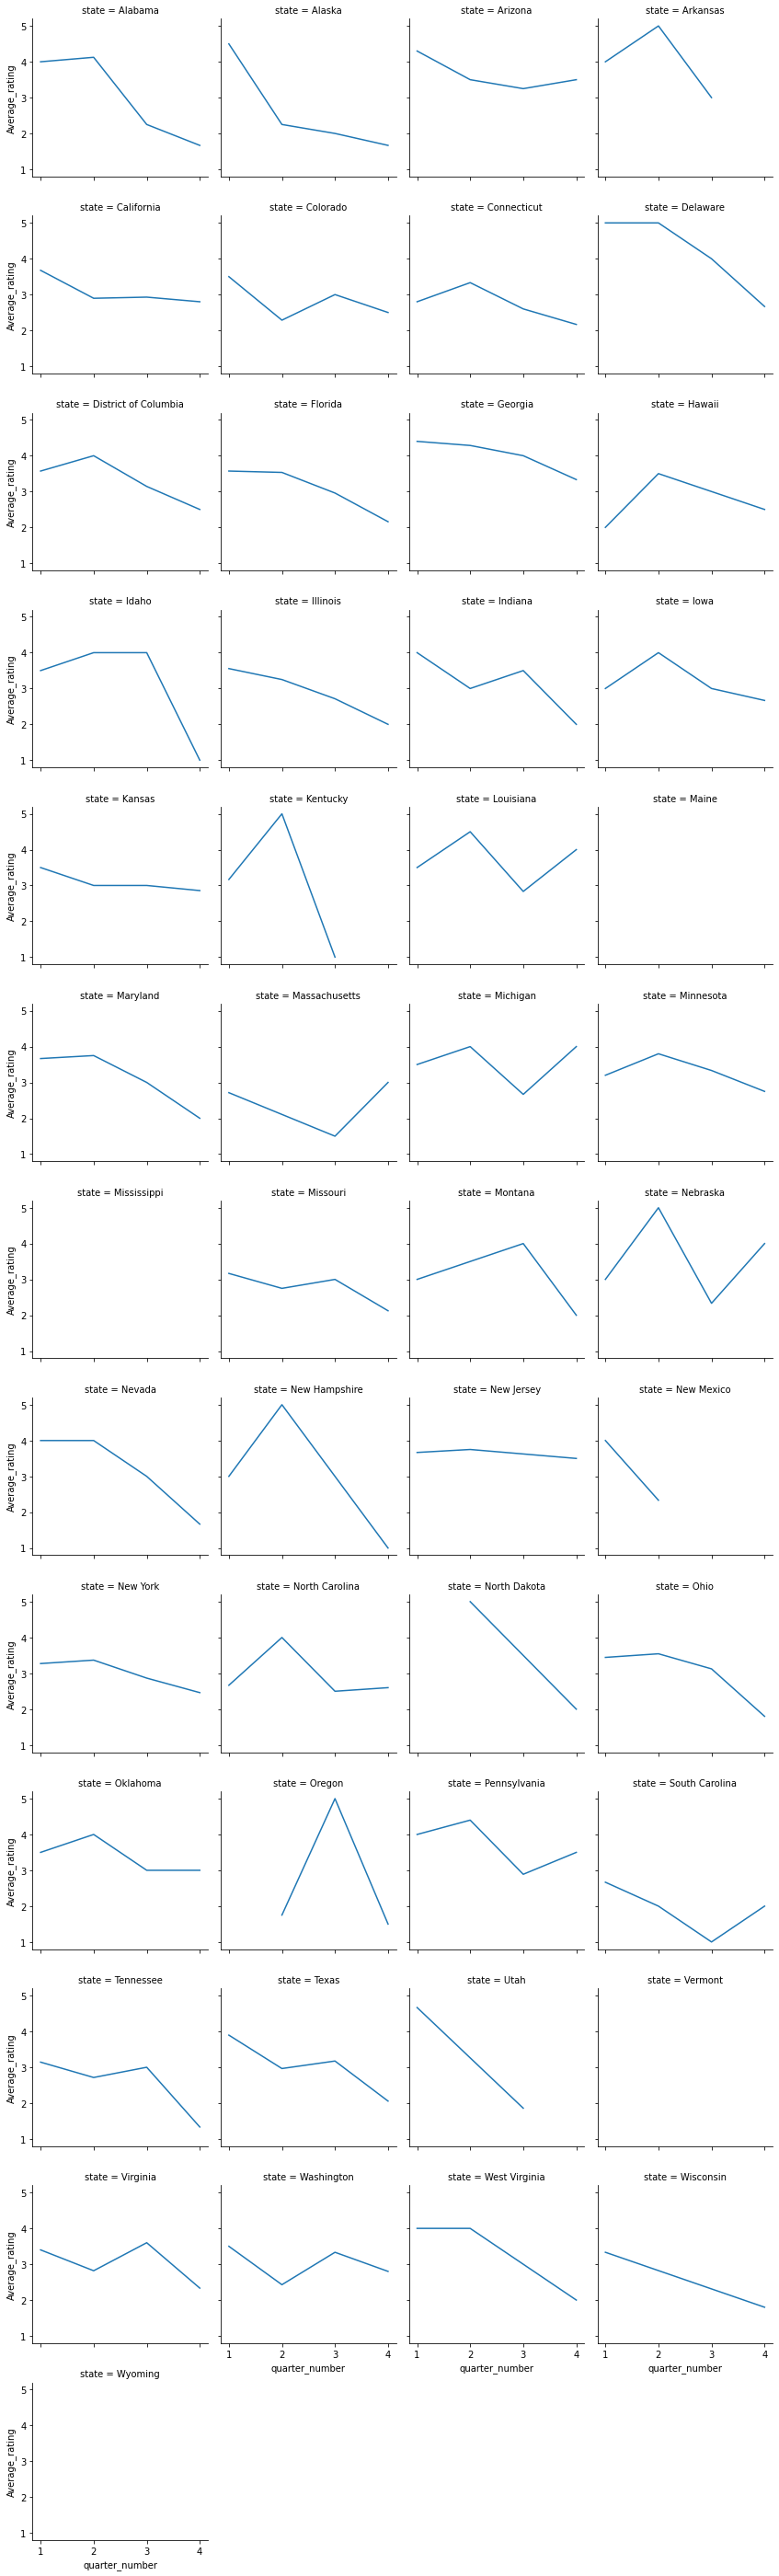

In [14]:
# Upload additional data (average feedback  value by state and  by quarter ) 

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q3_2.csv")

# Read the file
df = pd.read_csv(path)

# Show data
df

# Plot the figure by states 
g = sns.FacetGrid(df, col="state",col_wrap=4)
g.map(sns.lineplot, 'quarter_number',"Average_rating",markers=True);

In [15]:
# Print the observations
print('Observations:')
print('It seems that company looses customer satisfaction in most of the states. However, in few states there is an opposite trend')
print('See analysis of these figures below')

Observations:
It seems that company looses customer satisfaction in most of the states. However, in few states there is an opposite trend
See analysis of these figures below


In [16]:
# Postprocessing of figures (above)

# Find unique states in df 
states_names=df.state.unique()

# Create a dataframe for results
results=pd.DataFrame(data={'states': states_names})

# Find the rating difference between first quarter (not neccesary Q1) and last quarter(not neccesary Q4)
for i,state in enumerate(states_names):
    # Extract data for given state
    df_interm=df[df['state']==state]
    
    if len(df_interm['quarter_number'])==1:
        results.loc[i,'Difference']=np.nan;
    else:
        results.loc[i,'Difference']=df_interm['Average_rating'].iloc[-1]-df_interm['Average_rating'].iloc[0];
        
print('Observations:')
print('')
print('Number of states where average customer ratings have decreased:  ', len(results[results['Difference']<0]), 'out of 49')
print('Number of states where average customer ratings have increased:  ', len(results[results['Difference']>0]), 'out of 49')
print('Number of states where only 1 customer (with nan in results):  4 out of 49')
print('')
print('In most states, there is a trend of loosing the customer satisfaction. However, in 5 states (Hawaii,Louisiana,Massachusetts,Michigan and Nebraska) the customer ratings actually increased (not so significantly though). Hence, it would be useful to study the reasons of such situation in future ')


Observations:

Number of states where average customer ratings have decreased:   40 out of 49
Number of states where average customer ratings have increased:   5 out of 49
Number of states where only 1 customer (with nan in results):  4 out of 49

In most states, there is a trend of loosing the customer satisfaction. However, in 5 states (Hawaii,Louisiana,Massachusetts,Michigan and Nebraska) the customer ratings actually increased (not so significantly though). Hence, it would be useful to study the reasons of such situation in future 


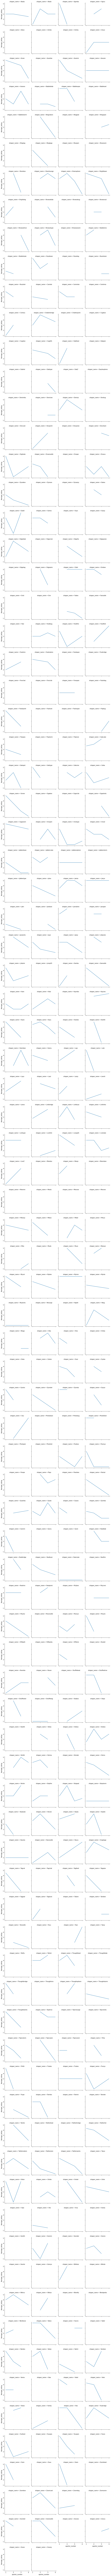

In [17]:
# Upload the data for average rating of each shipper

# Find the path for the file 
path = os.path.join(os.getcwd(),"Q3_3.csv")

# Read the file
df = pd.read_csv(path)

# Show data
df

# Plot the figure by states 
g = sns.FacetGrid(df, col="shipper_name",col_wrap=4)
g.map(sns.lineplot, 'quarter_number',"Average_rating",markers=True);



In [18]:
# Postprocessing of data 
shipper_names=df.shipper_name.unique()

# Create a dataframe with shipper names
results=pd.DataFrame(data={'shipper_name': shipper_names})

# Find the difference (for each shipper) between its average rating in Q1 (or other first quarter) and its average rating in Q4 (or other last quarter)
for i,shipper_name in enumerate(shipper_names):
    # Extract data for given state
    df_interm=df[df['shipper_name']==shipper_name]
    
    if len(df_interm['quarter_number'])==1:
        results.loc[i,'Difference']=np.nan;
    else:
        results.loc[i,'Difference']=df_interm['Average_rating'].iloc[-1]-df_interm['Average_rating'].iloc[0];
        
print('Observations:')
print('')
print('Number of shippers where average customer ratings have decreased:  ', len(results[results['Difference']<0]), 'out of', len(shipper_names),':')
print(results[results['Difference']<0]['shipper_name'].unique())
print('')
print('Number of shippers where average customer ratings have increased:  ', len(results[results['Difference']>0]), 'out of', len(shipper_names),':')
print(results[results['Difference']>0])
print('')
print('Number of shippers where only 1 value available  (with nan in results):',len(shipper_names)-len(results[results['Difference']<0])-len(results[results['Difference']>0]),'out of', len(shipper_names))
print('')
print('As recommendation, it may be useful to investigate the reasons of good and bad performance in each group of shippers (list of shippers is provided above)')


Observations:

Number of shippers where average customer ratings have decreased:   143 out of 362 :
['Abata' 'Agimba' 'Aivee' 'Avamm' 'Avaveo' 'Babbleblab' 'Babbleopia'
 'Blognation' 'Blogtags' 'Brainbox' 'Brainsphere' 'Brightbean'
 'Browseblab' 'Browsedrive' 'Browsetype' 'Bubbletube' 'Buzzbean'
 'Buzzster' 'Camido' 'Camimbo' 'Cogilith' 'Dabtype' 'Devshare' 'Digitube'
 'Divanoodle' 'Divavu' 'Dynabox' 'Eabox' 'Eamia' 'Edgeify' 'Edgewire'
 'Eimbee' 'Fadeo' 'Feedfire' 'Feednation' 'Flashpoint' 'Flipopia'
 'Gabspot' 'Gabtype' 'Geba' 'Gevee' 'Gigashots' 'Gigazoom' 'Innotype'
 'InnoZ' 'Jabberbean' 'Jaloo' 'Jatri' 'Jaxbean' 'Jaxworks' 'Jayo' 'Jazzy'
 'Jetpulse' 'Jetwire' 'Kanoodle' 'Kazio' 'Kazu' 'Kwideo' 'Kwilith' 'Kwinu'
 'Latz' 'Lazz' 'Linkbuzz' 'Linklinks' 'Livepath' 'Livetube' 'Meezzy'
 'Miboo' 'Muxo' 'Mycat' 'Mydeo' 'Mynte' 'Oba' 'Oloo' 'Oozz' 'Oyoba'
 'Oyoloo' 'Oyonder' 'Oyoyo' 'Pixonyx' 'Plajo' 'Podcat' 'Quatz' 'Quaxo'
 'Quimba' 'Quimm' 'Realblab' 'Realbridge' 'Realbuzz' 'Rhyloo' 'Rhy

## [Q4] Which are the top 5 vehicle makers preferred by the customer.


In [19]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q4.csv")

# Read the file
df = pd.read_csv(path)

# Show the data 
df.head(5)

vehicle_maker  CNT
0     Chevrolet   83
1          Ford   63
2        Toyota   52
3         Dodge   50
4       Pontiac   50

In [20]:
# Plot the figure 
fig = px.bar(df, 
             x='vehicle_maker', 
             y='CNT',
             labels={'CNT':'number of customers'})

# Update the layout 
fig.update_layout(
    title="Vehicle makers preferred by the customer",
    xaxis_title="States",
    yaxis_title="Number of customers",
    autosize=False,
    width=1000,
    height=600)

fig.show()

# Print the observations
print('Observations:')
print('Top 5 vehicle makers are Chevroler, Ford, Toyota, Dodge and Pontiac')

Observations:
Top 5 vehicle makers are Chevroler, Ford, Toyota, Dodge and Pontiac


## [Q5] What is the most preferred vehicle maker in each state?


In [21]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q5.csv")

# Read the file
df = pd.read_csv(path)

# Show data
df

state vehicle_maker  customer_number  ranking
0      Alabama         Dodge                6        1
1       Alaska     Chevrolet                2        1
2      Arizona       Pontiac                3        1
3      Arizona      Cadillac                3        1
4     Arkansas        Suzuki                1        1
..         ...           ...              ...      ...
138  Wisconsin        Nissan                1        1
139  Wisconsin      Cadillac                1        1
140  Wisconsin         Dodge                1        1
141  Wisconsin         Honda                1        1
142    Wyoming         Buick                1        1

[143 rows x 4 columns]

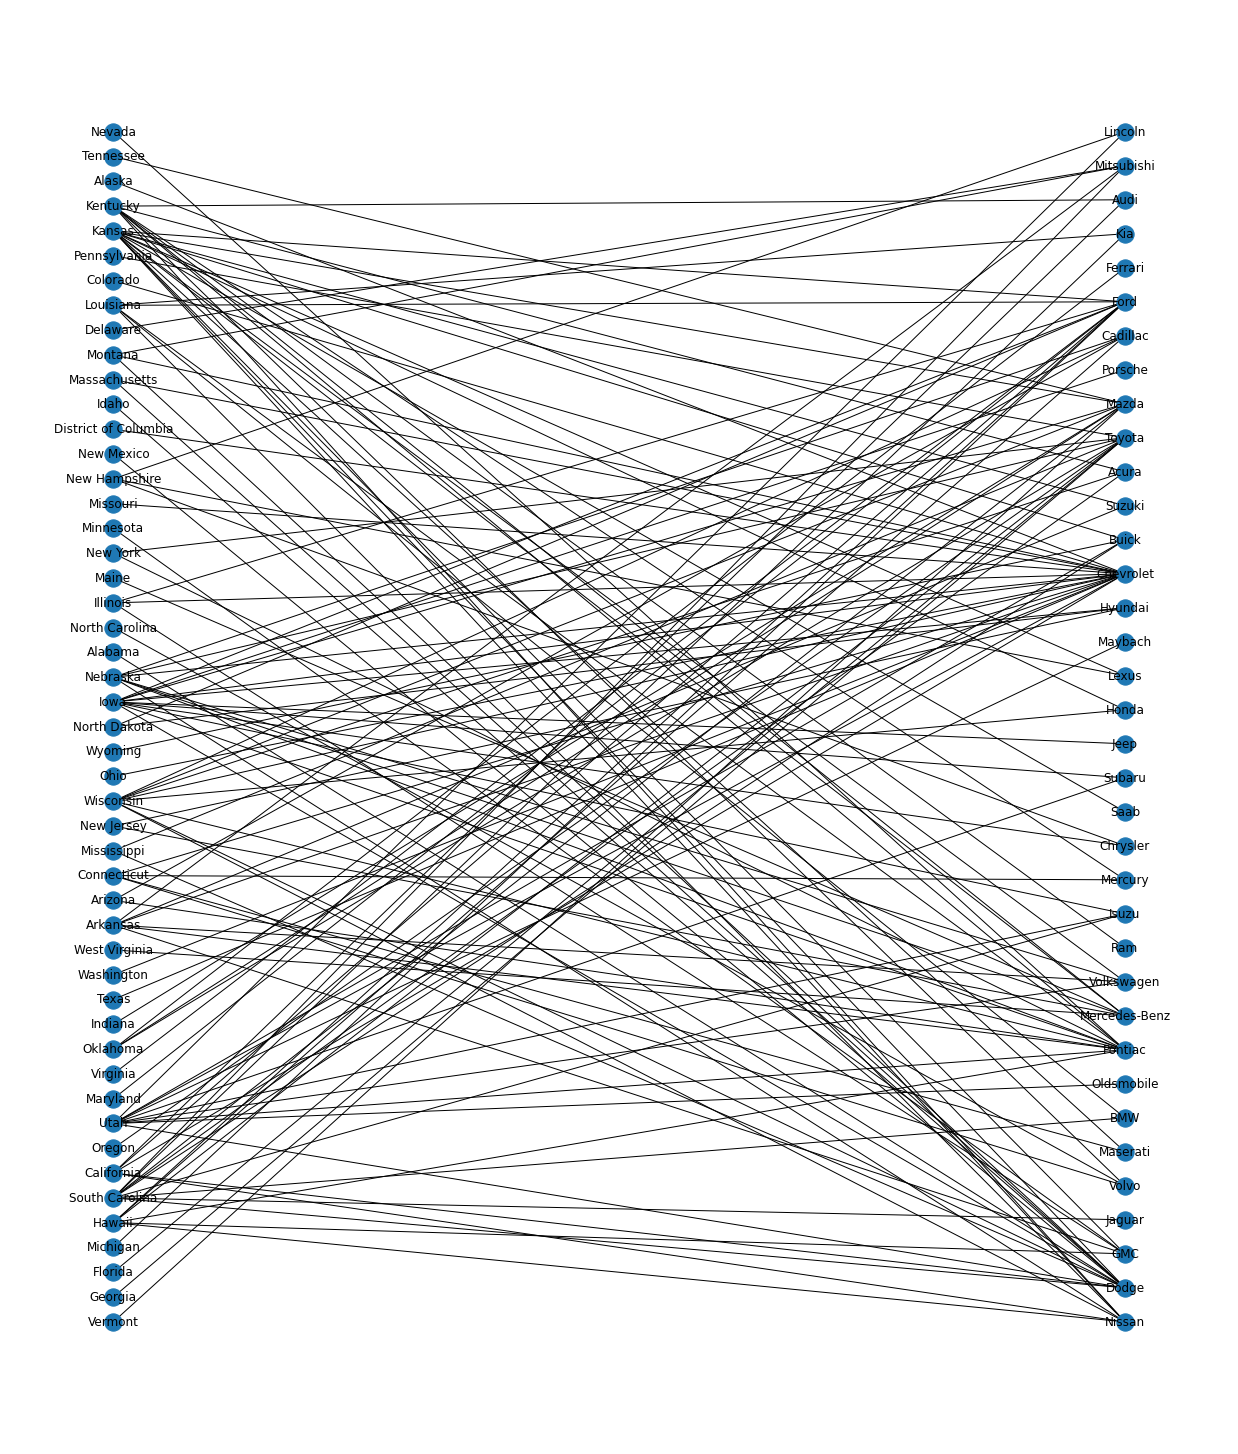

Observations:
The states are shown at the left side of the figure and they are connected to their most preferred vehicle maker at the right side.
Several lines mean that there is no unique preferred vehicle maker but there are few vehicle makers with equal number of customers 
There are states where customers prefer one vehicle maker e.g. Florida, Washington DC etc
There are also states where multiple vehicle makers: Utah, Louisiana etc


In [22]:
# Create a G graph between vehicle_maker and state
G=nx.from_pandas_edgelist(df,
                         target='vehicle_maker',
                         source='state')


# Prepare a figure size
plt.figure(figsize=(17,20))
   
# Draw graph
pos = nx.bipartite_layout(G, df['state'])
nx.draw(G, with_labels=True,pos=pos)

plt.show()

# Print the observations
print('Observations:')
print('The states are shown at the left side of the figure and they are connected to their most preferred vehicle maker at the right side.')
print('Several lines mean that there is no unique preferred vehicle maker but there are few vehicle makers with equal number of customers ')

print('There are states where customers prefer one vehicle maker e.g. Florida, Washington DC etc')
print('There are also states where multiple vehicle makers: Utah, Louisiana etc') 


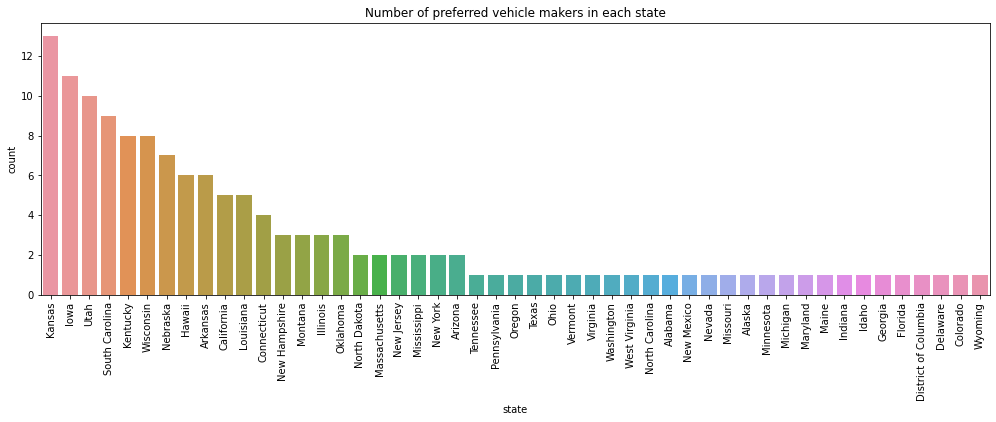

Observations:
Only 55.1 % of states have single preferred vehicle maker
Hence 44.9 % of states have multiple preferred vehicle makers


In [23]:
# Number of preferred vehicle makers in each state 

# Prepare a figure size and title
plt.figure(figsize=(17,5))
plt.title('Number of preferred vehicle makers in each state')

# Plot the figure 
sns.countplot(data=df, x='state', order = df['state'].value_counts().index);

# Rotate the names at x-axis
plt.xticks(rotation=90);

plt.show()
# Calculating the number of states having only 1 preferred vehicle maker 
cnt=df['state'].value_counts()
share_of_states_with_1_preferred_maker=(len(cnt[cnt==1]))/len(cnt)*100

# Print the observations
print('Observations:')
print('Only',round(share_of_states_with_1_preferred_maker,2),'% of states have single preferred vehicle maker')
print('Hence',100-round(share_of_states_with_1_preferred_maker,2),'% of states have multiple preferred vehicle makers')

## [Q6] What is the trend of number of orders by quarters?

In [24]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q6.csv")

# Read the file
df = pd.read_csv(path)
df

quarter_number  number_of_orders
0               1               310
1               2               262
2               3               229
3               4               199

In [25]:
# Create traces
fig = go.Figure()


# Plot the figure
fig.add_trace(go.Scatter(x=df['quarter_number'], 
                         y=df['number_of_orders'],
                         mode='lines',
                         name='Customer feedback'))

# Update the layout 
fig.update_layout(
    title="Number of orders per quarter:",
    xaxis_title="Quarters",
    yaxis_title="Number of orders",
    autosize=False,
    width=950,
    height=600)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1)
)

fig.show()

# Print the observations
print('Observations:')
print('Total number of orders:',df.number_of_orders.sum())
print('Number of orders is continously declining from',df['number_of_orders'][0],'in Q1 to',df['number_of_orders'][3],'in Q4')
print('Orders are droped by',round((df['number_of_orders'][3])/(df['number_of_orders'][0])*100,2),'%')

Observations:
Total number of orders: 1000
Number of orders is continously declining from 310 in Q1 to 199 in Q4
Orders are droped by 64.19 %


## [Q7] What is the quarter over quarter % change in revenue? 


In [26]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q7.csv")

# Read the file
df = pd.read_csv(path)

# Show data
df

quarter_number   revenue  PREVIOUS_quarter_REVENUE   QoQ(%)
0               1  39421574                       NaN      NaN
1               2  32715833                39421574.0 -17.0103
2               3  29229900                32715833.0 -10.6552
3               4  23346777                29229900.0 -20.1271

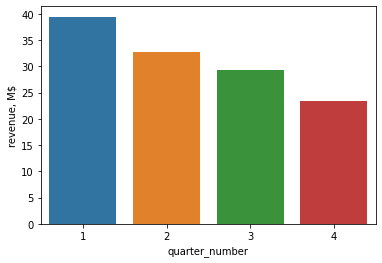

In [27]:
#  Prepare the figure size
df['revenue']=df['revenue']/1e6

# Plot the figure
ax =sns.barplot(data=df,x='quarter_number',y='revenue');
ax.set(xlabel='quarter_number', ylabel='revenue, M$')

plt.show()

## [Q8] What is the trend of revenue and orders by quarters?


In [28]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q8.csv")

# Read the file
df = pd.read_csv(path)

# Show data 
df

quarter_number  number_of_orders   revenue
0               1               310  39421574
1               2               262  32715833
2               3               229  29229900
3               4               199  23346777

In [29]:
# Create traces
fig = go.Figure()

# Plot the figure 
fig.add_trace(go.Scatter(x=df['quarter_number'], 
                         y=df['revenue'],
                         mode='lines',
                         name='Customer feedback'))

# Update the layout 
fig.update_layout(
    title="Revenue per quarter:",
    xaxis_title="Quarters",
    yaxis_title="Revenue, $",
    autosize=False,
    width=1000,
    height=600)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1)
)

fig.show()

# Print the observations
print('Observtions:')
print('Total revenue for the year:', df['revenue'].sum()/1e6,'M$')
print('Revenue decreased by', round((df['revenue'][3])*100/df['revenue'][0]),'%:')
print('From', round(df['revenue'][0]/1e6,2),'M$ in Q1 to',round(df['revenue'][3]/1e6,2), 'M$ in Q4')

Observtions:
Total revenue for the year: 124.714084 M$
Revenue decreased by 59 %:
From 39.42 M$ in Q1 to 23.35 M$ in Q4


##  [Q9] What is the average discount offered for different types of credit cards?


In [30]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q9.csv")

# Read the file
df = pd.read_csv(path)

# Show the data 
df

credit_card_type  mean_dicsount
0                       laser       0.643846
1                  mastercard       0.629500
2                     maestro       0.624219
3               visa-electron       0.623469
4              china-unionpay       0.622174
5                instapayment       0.620625
6             americanexpress       0.616327
7           diners-club-us-ca       0.614615
8   diners-club-carte-blanche       0.614490
9                      switch       0.610233
10                   bankcard       0.609545
11                        jcb       0.607382
12                       visa       0.600833
13        diners-club-enroute       0.599792
14                       solo       0.585000
15  diners-club-international       0.584000

In [31]:
#Plot the figure 

fig = px.bar(df, 
             x='credit_card_type', 
             y='mean_dicsount')

# Update the layout 
fig.update_layout(
    title="Mean discount per card type",
    xaxis_title="credit_card_type",
    yaxis_title="mean_dicsount, %",
    autosize=False,
    width=950,
    height=600)

fig.show()

# Print the observations
print('Observtions:')
print('In average, the discount across all cards is', round(np.mean(df['mean_dicsount']),2),'%. No significant difference is detected')

Observtions:
In average, the discount across all cards is 0.61 %. No significant difference is detected


## [Q10] What is the average time taken to ship the placed orders for each quarters?


In [32]:
# Find the path for the file 
path = os.path.join(os.getcwd(),"Q10.csv")

# Read the file
df = pd.read_csv(path)

# Show the data 
df

quarter_number  average_delivery_time
0               1                57.1677
1               2                71.1107
2               3               117.7555
3               4               174.0955

In [33]:
# Create traces
fig = go.Figure()

# Plot the figure 
fig.add_trace(go.Scatter(x=df['quarter_number'], 
                         y=df['average_delivery_time'],
                         mode='lines',
                         name='average_delivery_time'))

# Update the layout 
fig.update_layout(
    title="average_delivery_time:",
    xaxis_title="Quarters",
    yaxis_title="average_delivery_time, days",
    autosize=False,
    width=1000,
    height=600)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1)
)

fig.show()

# Print the observations
print('Observtions:')
print('Average delivery time over the year', round(df['average_delivery_time'].mean(),2))
print('Delivery time raised by', round((df['average_delivery_time'][3])*100/df['average_delivery_time'][0]),'%:')
print('From', round(df['average_delivery_time'][0]/30,2),'months to',round(df['average_delivery_time'][3]/30,2), 'months')

Observtions:
Average delivery time over the year 105.03
Delivery time raised by 305 %:
From 1.91 months to 5.8 months


In [34]:
# Checking if hypothesis that the increased delivery time lead to bad feedback 
# To check it, let us see if there is a correlation between mean delivery time and mean feedback by each state 
# Negative correlation would mean that if delivery time increases then the rating decreases. 
# Positive correlation would mean that if delivery time increases then the rating also increases. 

# This negative correlation would confirm the hypothesis as customer would be unsatisfied by slow delivery. The positive correlation, however, would mean opposite and normally it is expected to not have it. However, positive correlation would also mean that there is likely another reason affectng the rating 

# Find the path for the file 
path = os.path.join(os.getcwd(),"add_study_corr.csv")

# Read the file
df = pd.read_csv(path)

# Show the data 
print(df)

# Find the correlation between Average_rating and average_delivery_time by state 
df_corr=df.groupby(by=['state'])[['Average_rating','average_delivery_time']].corr().unstack().iloc[:,1]

# Sort values in acsending order
df_corr.sort_values()


# Print the observations
print('Observations:')
print ()
print('In',len(df_corr[df_corr<0]), 'states, there is a negative correlation between Average_rating and average_delivery_time. This means that it may be possible that low ratings are due to slow delivery')
print ()
print('In',len(df_corr[df_corr>0]), 'states, there is a positive correlation between Average_rating and average_delivery_time. It is like if customers would be satisfied by slow delivery. This means that it may be possible that low ratings are not due to slow delivery but some other reason')
print ()
print('In 4 states (Maine, Mississippi,Vermont and Wyoming) it is impossible to calculate correlation as only one value is presented')
print ()
print ('Pay attention to correlation equal to +1 or -1 as they are calculated from 2 values only  (more points would be needed)')

             state  quarter_number  Average_rating  average_delivery_time
0          Alabama               1          4.0000                61.2667
1          Alabama               2          4.1250                72.2500
2          Alabama               3          2.2500                51.0000
3          Alabama               4          1.6667               136.3333
4           Alaska               1          4.5000                79.0000
..             ...             ...             ...                    ...
162  West Virginia               2          4.0000                65.0000
163  West Virginia               4          2.0000               162.0000
164      Wisconsin               1          3.3333                44.3333
165      Wisconsin               4          1.8000               192.6000
166        Wyoming               2          3.0000               185.0000

[167 rows x 4 columns]
Observations:

In 37 states, there is a negative correlation between Average_rating and 

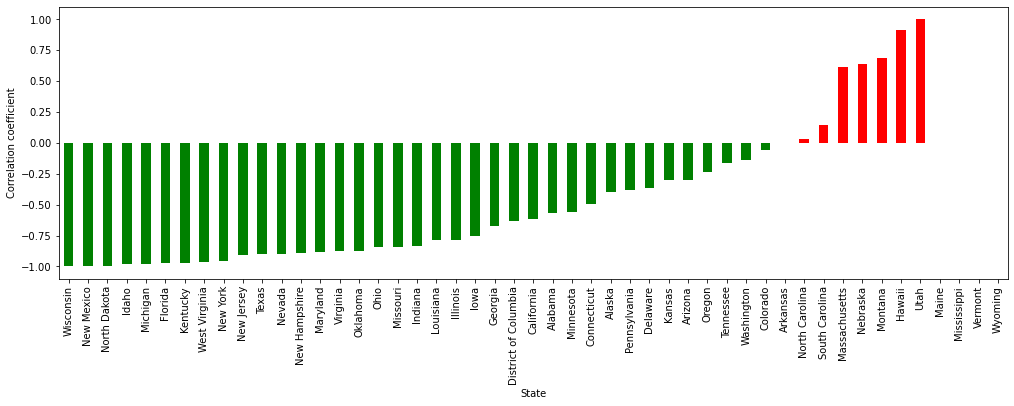

In [35]:
# Prepare a figure size and title
plt.figure(figsize=(17,5))

# Plot figure
ax =df_corr.sort_values().plot(kind='bar',x=df_corr.sort_values().reset_index().state,color=np.where(df_corr.sort_values() < 0, 'g', 'r'))
ax.set(xlabel='State', ylabel='Correlation coefficient')

# Show results
plt.show()